### This Lab Assignment is done by CS20B1044 Avinash R Changrani

NOTE :- Kindly follow the instructions as given in the Tutorial.

Dataset - Can be downloaded from keras or pytorch directly similar to MNIST.

Implement the ANN for classifying the images from CIFAR-10 dataset. Steps to be followed are as follows -
   * Flatten the input image dimensions to 1D (width pixels x height pixels)
   * Normalize the image pixel values (divide by 255)
   * One-Hot Encode the categorical column
   * Build a model architecture (Sequential) with Dense layers(Fully connected layers)
   * Train the model and make predictions

Information about the dataset -

The CIFAR-10 dataset consists of 60,000 32 x 32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
The important points that distinguish this dataset from MNIST are:

   * Images are colored in CIFAR-10 as compared to the black-and-white texture of MNIST
   * Each image is 32 x 32 pixel
   * 50,000 training images and 10,000 testing images

Now, these images are taken in varying lighting conditions and at different angles, and since these are colored images, you will see that there are many variations in the color itself of similar objects (for example, the color of ocean water).

In [58]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.datasets import cifar10
import keras
from sklearn.metrics import confusion_matrix
import random

In [59]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [60]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [61]:
# print the number of classes in the dataset
print("Number of classes: ", len(np.unique(y_train)))

Number of classes:  10


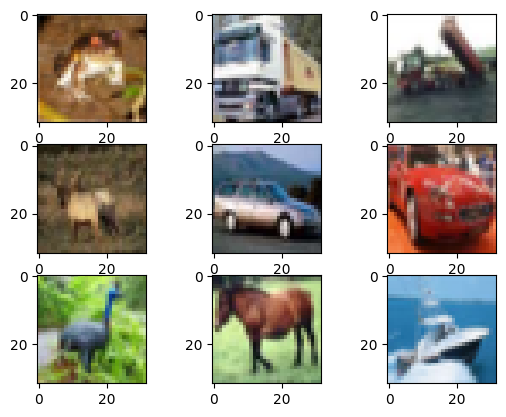

In [62]:
# print the first 9 images in the training dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [63]:
# flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [64]:
X_train

array([[ 59.,  62.,  63., ..., 123.,  92.,  72.],
       [154., 177., 187., ..., 143., 133., 144.],
       [255., 255., 255., ...,  80.,  86.,  84.],
       ...,
       [ 35., 178., 235., ...,  12.,  31.,  50.],
       [189., 211., 240., ..., 195., 190., 171.],
       [229., 229., 239., ..., 163., 163., 161.]], dtype=float32)

In [65]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [66]:
# normalize the images by dividing by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [67]:
# one hot encode the target variables
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [68]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

X_train shape (50000, 3072)
y_train shape (50000, 10)


In [69]:
# create the model using the Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape=(3072,), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               1573376   
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 1746506 (6.66 MB)
Trainable params: 1746506 (6.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


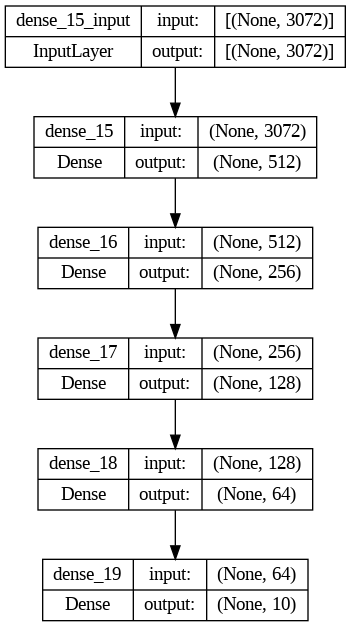

In [70]:
keras.utils.plot_model(model, show_shapes=True)

In [71]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
1250/1250 [==============================] - 7s 4ms/step - loss: 1.9207 - accuracy: 0.2972 - val_loss: 1.7811 - val_accuracy: 0.3547
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7406 - accuracy: 0.3711 - val_loss: 1.7106 - val_accuracy: 0.3890
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6532 - accuracy: 0.4072 - val_loss: 1.6768 - val_accuracy: 0.4006
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5923 - accuracy: 0.4254 - val_loss: 1.6422 - val_accuracy: 0.4067
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5516 - accuracy: 0.4420 - val_loss: 1.5868 - val_accuracy: 0.4410
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5215 - accuracy: 0.4542 - val_loss: 1.5772 - val_accuracy: 0.4463
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4896 - accuracy: 0.4638 - val_loss: 1.5264 - val_accuracy:

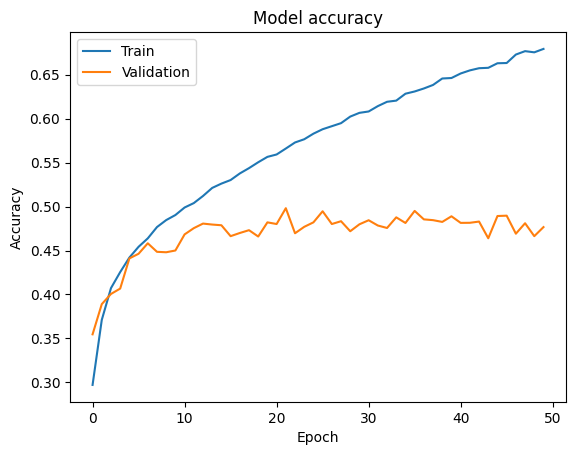

In [72]:
# train the model for 30 epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

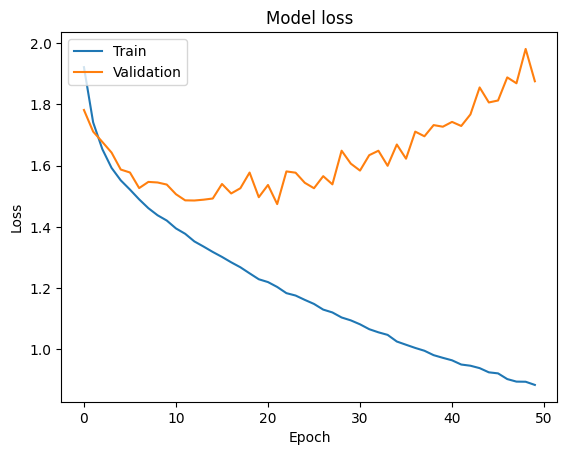

In [73]:
# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [74]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.8701 - accuracy: 0.4813
Test accuracy: 0.4812999963760376
Test loss: 1.8700687885284424


313/313 [==============================] - 1s 3ms/step


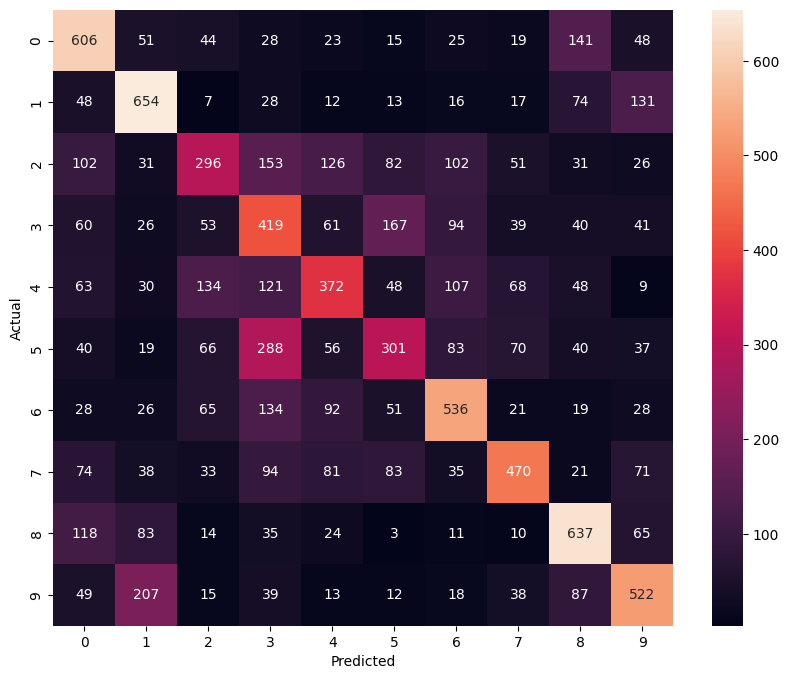

In [75]:
# plot the confusion matrix for the test set predictions


y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

conf_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 [==============================] - 0s 18ms/step
Predicted: 4
Actual: 4
Probability: 0.56487656


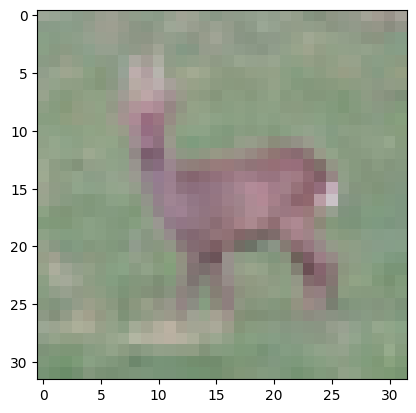

In [78]:
# random image from the test set and predict the class and probability and show Predicted vs Actual

i = random.randint(0, 10000)

plt.imshow(X_test[i].reshape(32, 32, 3))

y_pred = model.predict(X_test[i].reshape(1, 3072))

print('Predicted:', y_pred.argmax())

print('Actual:', y_test[i].argmax())

print('Probability:', y_pred.max())
